**Problem Statement:** The aim of this case study is to understand various factors which influence the loan approval /rejection process at a bank. During the course of this study, we will derive some useful insights from the data which will help the bank to optimize their profits by reducing bad loans.

The two input files are extracted and transformed, and a few columns are visualized using various Python libraries. These visuals are then used to infer the data.

### 1.Importing various libraries and reading the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

In [76]:
# Load data files
new_loan_application=pd.read_csv(r"C:\Users\Admin\Downloads\application_data.csv")
pre_loan_application=pd.read_csv(r"C:\Users\Admin\Downloads\previous_application.csv")

In [3]:
# Sanity check application data file

new_loan_application.shape

(307511, 122)

In [4]:
# Sanity check previous loan application data file

pre_loan_application.shape

(1670214, 37)

### 2. Describing datasets and performing data quality checks

In [5]:
# Summary of numerical columns in application data

new_loan_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# Checking column names, data types and number of non-null values in application data

new_loan_application.info(verbose=True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
# Checking column names, data types and number of non-null values in application data

pre_loan_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
# Summary of numerical columns in application data

pre_loan_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### 3. Data Analysis for new loan applications

#### 3.1 Check new values in the new loan application dataset and removing the columns which have more than 50 percent rows with null values. 

In [9]:
# Find out average number of null values in each column in application data

round(new_loan_application.isnull().mean()*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

#### While closely looking at the columns which contains more than 50% null values, one can determine that these columns will  not be adding much value to the analysis being done in this case study and hence it is safe to remove those.

In [10]:
#Removing all the columns with more than 30% null values

new_loan_application = new_loan_application.loc[:,new_loan_application.isnull().mean()<0.3]

# Check shape of the resultant dataset

new_loan_application.shape

(307511, 72)

In [11]:
# Check columns with reasonable percentage (10%) of null values and possible imputation.

list(new_loan_application.columns[(new_loan_application.isnull().mean()<=0.1) & (new_loan_application.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

### 4. Imputing values

#### 4.1 mputing null values for AMT_ANNUITY

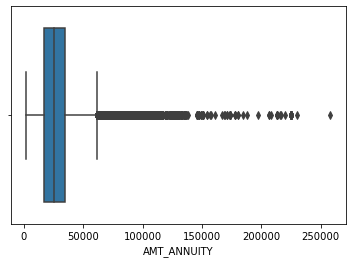

In [12]:
# Identifying the outliers

sns.boxplot(new_loan_application['AMT_ANNUITY'])
plt.show()

In [13]:
# As the boxplot indicates that there is a high number of outliers present in this column it is safe to impute the null values with median.

new_loan_application['AMT_ANNUITY'] = new_loan_application['AMT_ANNUITY'].fillna(new_loan_application['AMT_ANNUITY'].median())

#### 4.2 Imputing null values for AMT_GOODS_PRICE

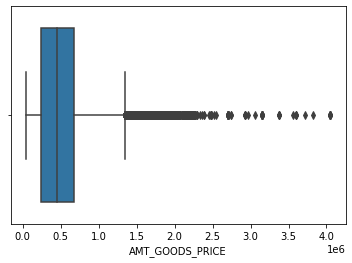

In [14]:
# Identifying the outliers 

sns.boxplot(new_loan_application['AMT_GOODS_PRICE'])
plt.show()

In [15]:
# As the boxplot indicates that there is a high number of outliers present in this column it is safe to impute the null values with median.

new_loan_application['AMT_GOODS_PRICE'] = new_loan_application['AMT_GOODS_PRICE'].fillna(new_loan_application['AMT_GOODS_PRICE'].median())

#### 4.2 Imputing null values for CNT_FAM_MEMBERS

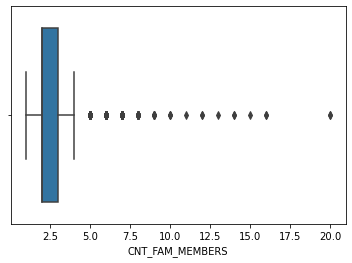

In [16]:
sns.boxplot(new_loan_application['CNT_FAM_MEMBERS'])
plt.show()

In [17]:
#Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn

new_loan_application['CNT_FAM_MEMBERS'] = new_loan_application['CNT_FAM_MEMBERS'].fillna(new_loan_application['CNT_FAM_MEMBERS'].median())

### 5. Analysis on different attributes of importance

In [18]:
# Checking Gender column
new_loan_application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [19]:
# As there are ony 4 rows with XNA, removing these rows will not impact analysis for other values in the GENDER column. Hence we will drop these 
# rows from the dataset
new_loan_application=new_loan_application[-(new_loan_application['CODE_GENDER']=='XNA')]

In [20]:
# Checking ORGANIZATION TYPE column
new_loan_application['ORGANIZATION_TYPE'].shape

new_loan_application[new_loan_application['ORGANIZATION_TYPE']=='XNA'].shape

# There are 55374 out of 307507 rows with XNA as value for this column. 
# As this is less than 20% of the dataset and is categorical dataset, it is fine to remove this from the dataset.

(55374, 72)

In [21]:
# Remove rows from dataset where ORGANIZATION TYPE is 'XNA'
new_loan_application=new_loan_application[-(new_loan_application['ORGANIZATION_TYPE']=='XNA')]

### 6. Binning for variable analysis

In [22]:
# Creating a new column INCOME_GROUP to analyze correlation between Income of an individual and probabiity to default

new_loan_application['INCOME_GROUP']=pd.qcut(new_loan_application['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [23]:
new_loan_application['INCOME_GROUP'].value_counts()

Medium      91766
VeryHigh    42613
VeryLow     39502
High        39347
Low         38905
Name: INCOME_GROUP, dtype: int64

In [24]:
#Creating a column AGE using DAYS_BIRTH column , which will help to analyze correlation between age of an individual and 
#probabiity to default

new_loan_application['AGE']=abs(new_loan_application['DAYS_BIRTH'])//365.25

In [25]:
new_loan_application['AGE'].describe()

count    252133.000000
mean         39.934824
std          10.025750
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          68.000000
Name: AGE, dtype: float64

In [26]:
## Since the AGE ranges between 20 and 68, create bins of 5 years starting from 20 to 70, which will be more logical to analyze

new_loan_application['AGE_GROUP'] = pd.cut(new_loan_application['AGE'],bins=np.arange(20,71,5))

In [27]:
new_loan_application['AGE_GROUP'].value_counts()

(35, 40]    43352
(40, 45]    39301
(30, 35]    39291
(25, 30]    36432
(45, 50]    32807
(50, 55]    28232
(20, 25]    16357
(55, 60]    11932
(60, 65]     3924
(65, 70]      504
Name: AGE_GROUP, dtype: int64

In [28]:
# Adding an important attribute - Loan amount to Income ratio which can be used to analyze the relation between its value vs. 
# proability of default

new_loan_application['CREDIT_INCOME_RATIO']=round((new_loan_application['AMT_CREDIT']/new_loan_application['AMT_INCOME_TOTAL']))

### 6. Checking for imbalance in Target Variable

In [29]:
new_loan_application['TARGET'].value_counts(normalize=True)*100

0    91.339888
1     8.660112
Name: TARGET, dtype: float64

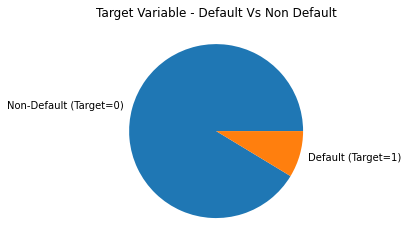

In [30]:
plt.pie(new_loan_application['TARGET'].value_counts(normalize=True)*100,labels=['Non-Default (Target=0)','Default (Target=1)'])
plt.title('Target Variable - Default Vs Non Default')
plt.show()

#### From above plot it is clear that there is an imbalance between Non-defaulters (92%) vs Defaulters (8%)

#### To further proceed with the analysis, we will divide the dataset into two dataframes, one to analyze the defaulters (Target = 1) and another one to analyze the non-defaulters (Target = 0)

In [31]:
loan_default = new_loan_application[new_loan_application['TARGET']==1]
loan_comply = new_loan_application[new_loan_application['TARGET']==0]

### 7. Univariate Categorial Variable Analysis

In [32]:
# function to count plot for categorical variables
def viz_loan_uni_ans(var):

    plt.style.use('fivethirtyeight')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(data=loan_comply,ax=ax1,x=var)
    ax1.set_ylabel('Total Applications')
    ax1.set_title(f'Non-Defaulters by {var}',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
    
    # Adding the percentage for easier comparision between defaulters and non-defaulters
    
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(loan_comply))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=loan_default,ax=ax2)
    ax2.set_ylabel('Total Applications')
    ax2.set_title(f'Defaulters by {var}',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(loan_default))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

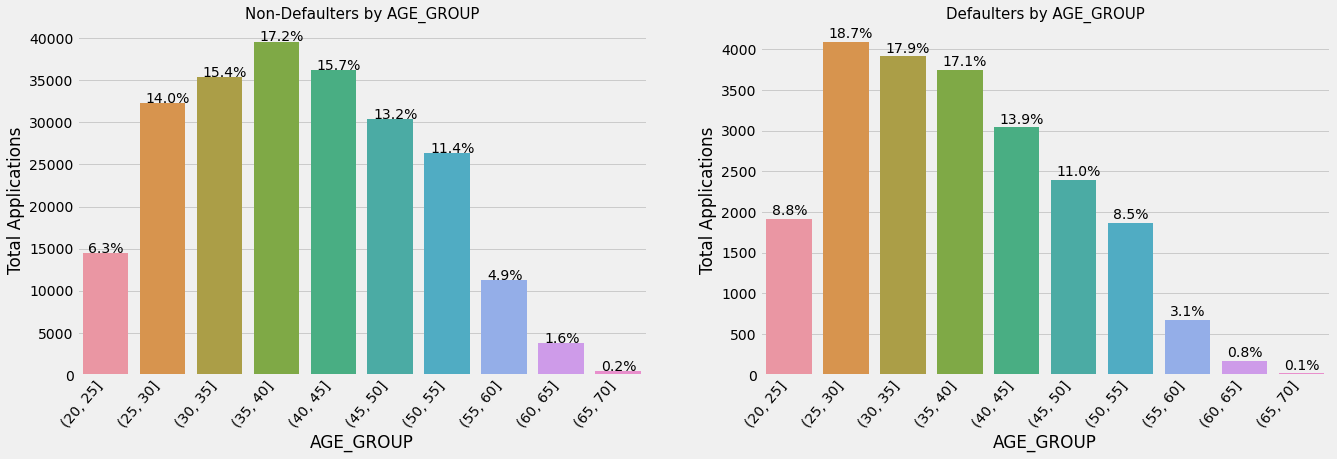

In [33]:
viz_loan_uni_ans('AGE_GROUP')

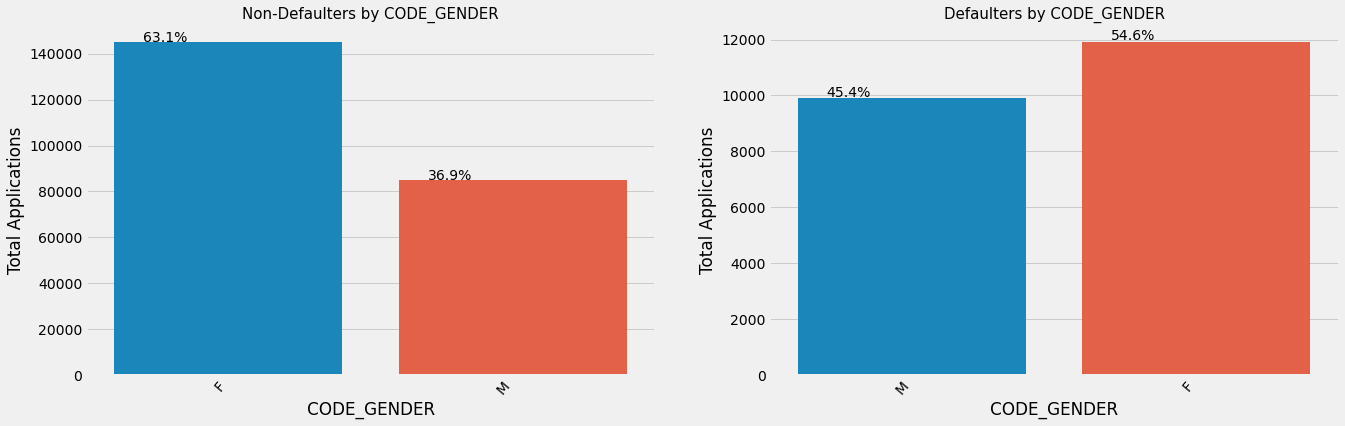

In [34]:
viz_loan_uni_ans('CODE_GENDER')

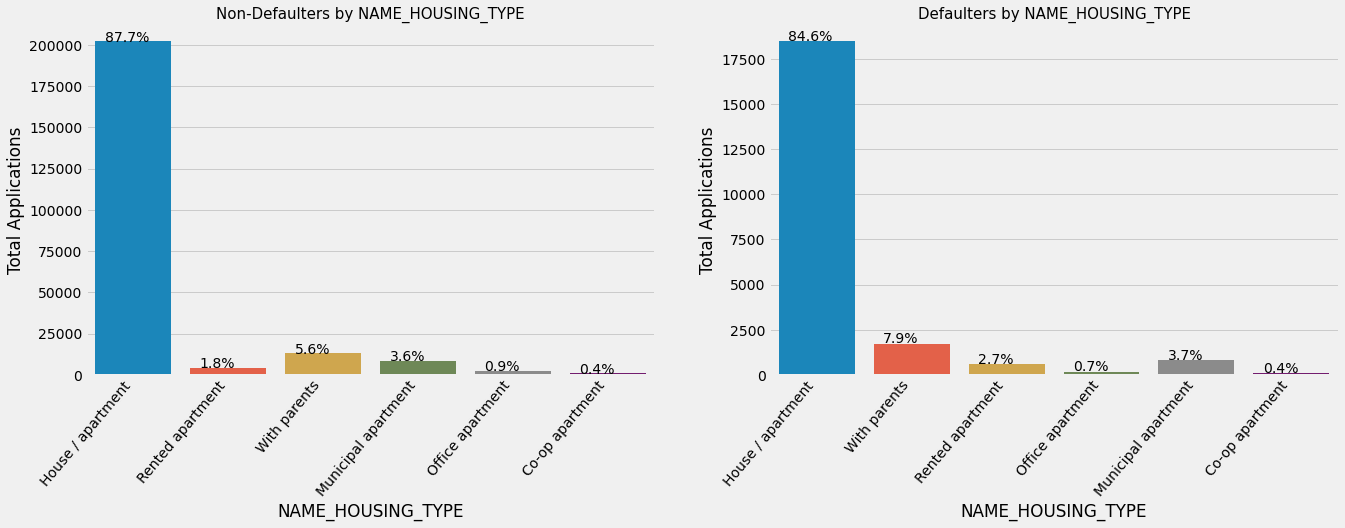

In [35]:
viz_loan_uni_ans('NAME_HOUSING_TYPE')

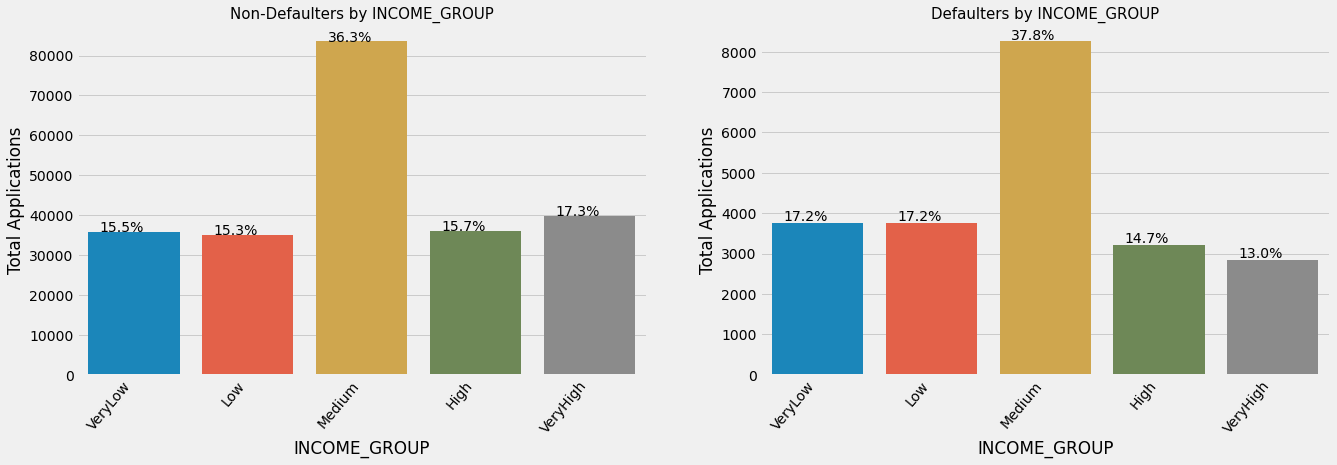

In [36]:
viz_loan_uni_ans('INCOME_GROUP')

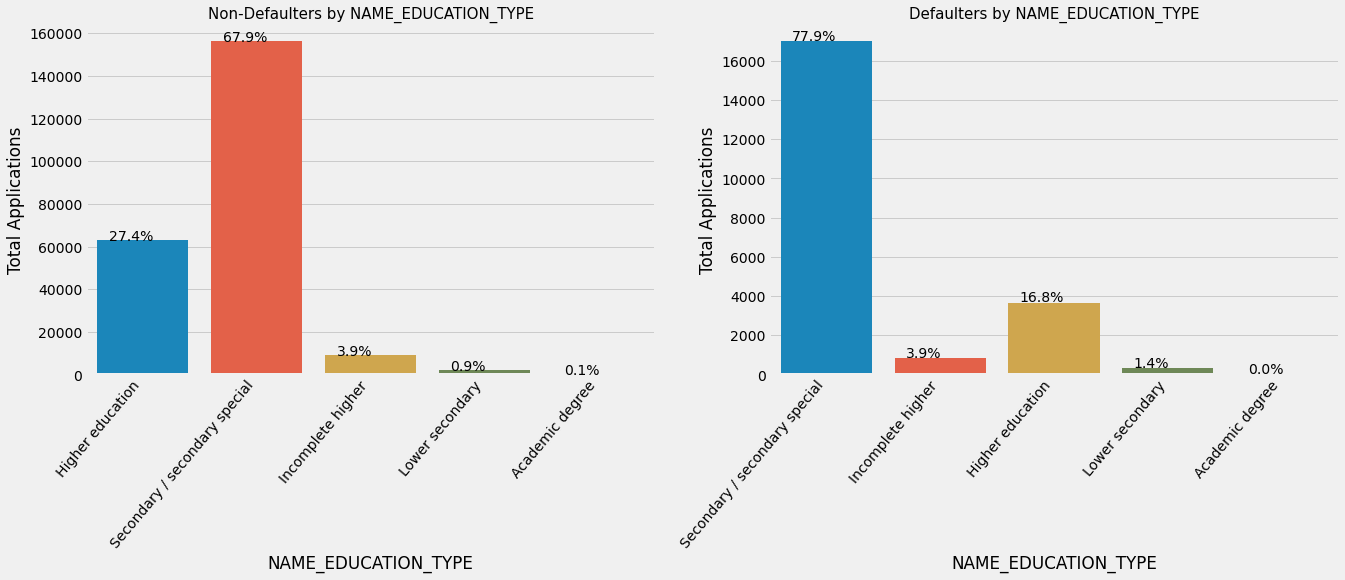

In [37]:
viz_loan_uni_ans('NAME_EDUCATION_TYPE')

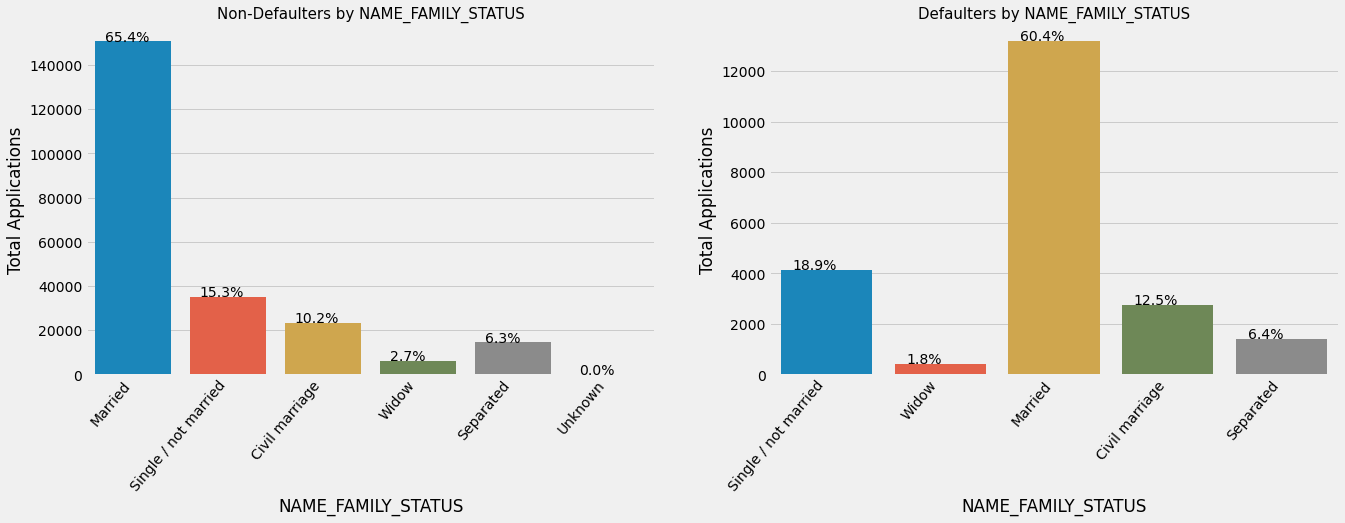

In [38]:
viz_loan_uni_ans('NAME_FAMILY_STATUS')

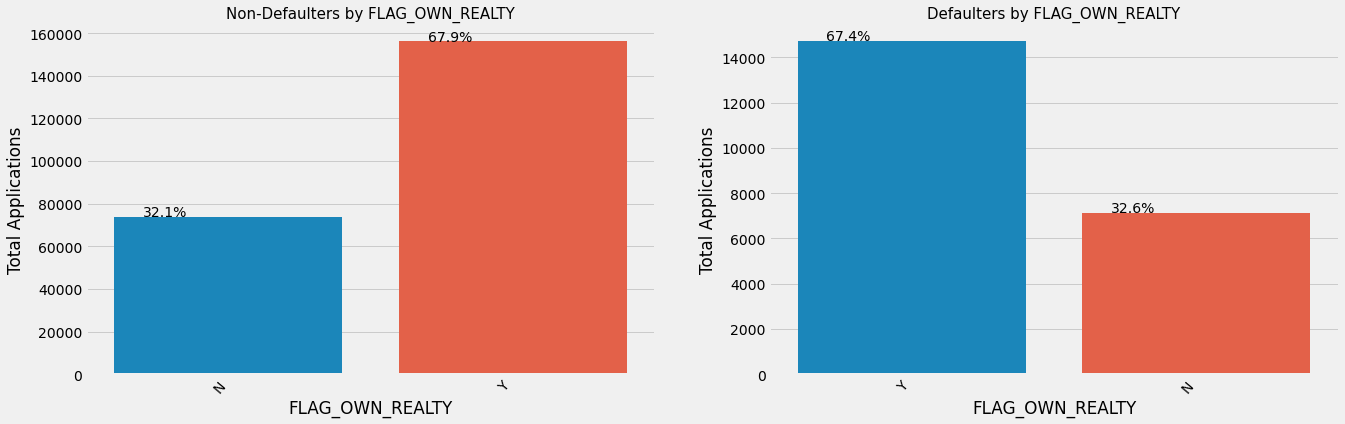

In [39]:
viz_loan_uni_ans('FLAG_OWN_REALTY')

### 8. Univariate Continuous Variable Analysis

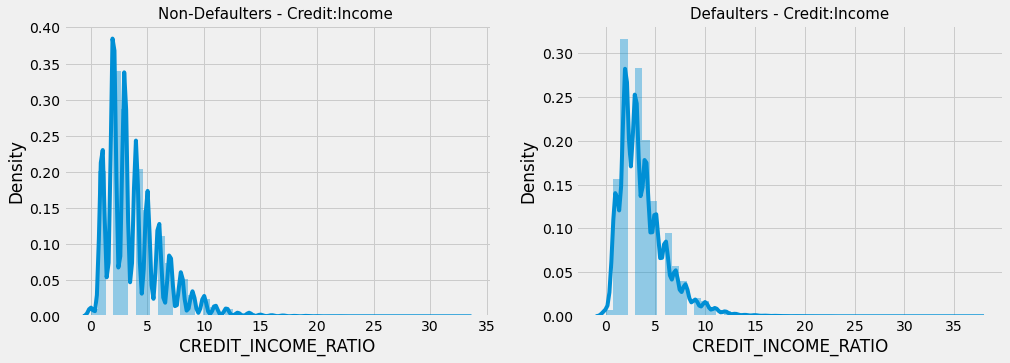

In [40]:

plt.style.use('fivethirtyeight')
sns.despine
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))    
sns.distplot(a=loan_comply['CREDIT_INCOME_RATIO'],ax=ax1)
ax1.set_title(f'Non-Defaulters - Credit:Income ',fontsize=15)
            
sns.distplot(a=loan_default['CREDIT_INCOME_RATIO'],ax=ax2)
ax2.set_title(f'Defaulters - Credit:Income',fontsize=15)    
        
plt.show()

### 9. Bivariate Analysis

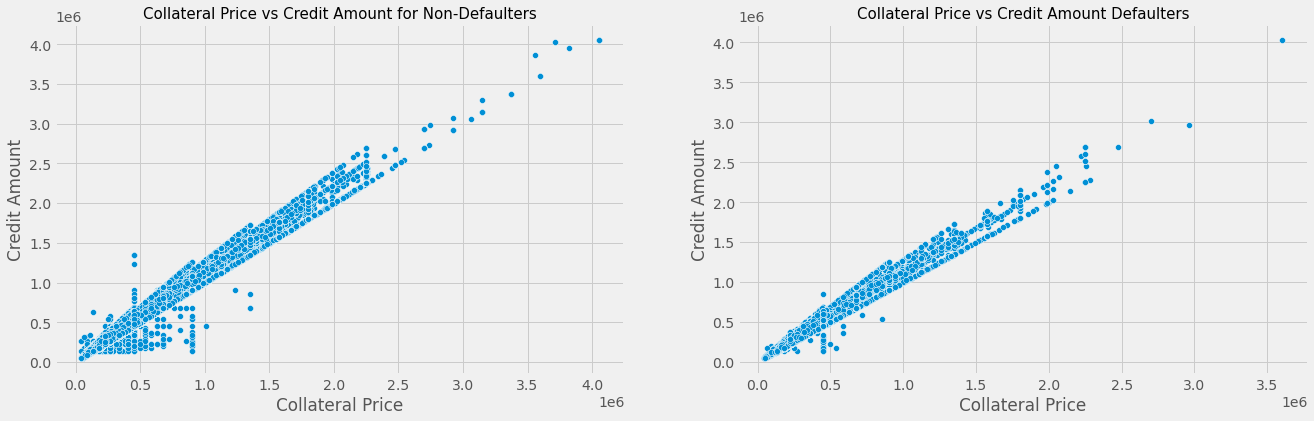

In [45]:
# Plot AMT_GOODS_PRICE vs AMT_CREDIT in case of defaulters and non-defaluters and analyze the correlation between two variables.
plt.style.use('fivethirtyeight')
sns.despine
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT',data=loan_comply,ax=ax1)
ax1.set_xlabel('Collateral Price')    
ax1.set_ylabel('Credit Amount')
ax1.set_title('Collateral Price vs Credit Amount for Non-Defaulters',fontsize=15)
    
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT',data=loan_default,ax=ax2)
ax2.set_xlabel('Collateral Price')    
ax2.set_ylabel('Credit Amount')
ax2.set_title('Collateral Price vs Credit Amount Defaulters',fontsize=15)

plt.show()

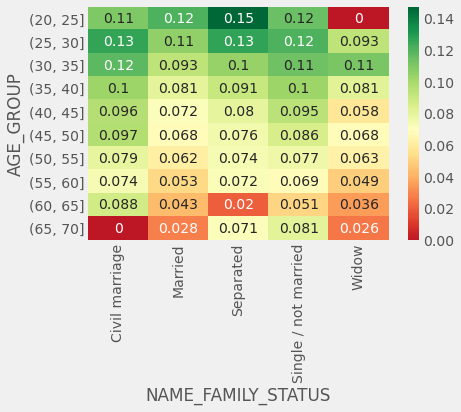

In [59]:
# To analyze correlation between Age group, family status and probability of default for an applicant

#First remove the rows with Unknown as value for Family status. For this analysis we will use the new_loan_application dataframe
# which has both the values of target variable.

inp1 = new_loan_application[new_loan_application['NAME_FAMILY_STATUS']!='Unknown']

#Create a pivot table to generate the correlation value between the variables

res=pd.pivot_table(data= inp1, index = 'AGE_GROUP',columns='NAME_FAMILY_STATUS',values = 'TARGET')

# Create a heatmap to show show the correlation 

sns.heatmap(res,annot=True,center = 0.07,cmap='RdYlGn')
plt.show()

### 10. Top 10 Correlations

In [74]:
inp_corr = new_loan_application.corr()
corr_tb = inp_corr.where(np.triu(np.ones(inp_corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_tb.columns=['Attribute 1','Attribute 2','Val']
corr_tb.dropna(subset=['Val'],inplace=True)
corr_tb['Abs_Correlation']=corr_tb['Val'].abs()
corr_tb = corr_tb.sort_values(by=['Abs_Correlation'], ascending=False)
corr_tb.head(10)

,Attribute 1,Attribute 2,Val,Abs_Correlation
3851,AGE,DAYS_BIRTH,-0.999591,0.999591
2046,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998473,0.998473
382,AMT_GOODS_PRICE,AMT_CREDIT,0.986194,0.986194
1279,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950318,0.950318
1136,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893280,0.893280
2110,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.862340,0.862340
1535,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.859216,0.859216
1727,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.815817,0.815817
383,AMT_GOODS_PRICE,AMT_ANNUITY,0.765439,0.765439
319,AMT_ANNUITY,AMT_CREDIT,0.761292,0.761292


### 11. Analysis on Previous application dataset

In [79]:
new_loan_application.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
pre_loan_application.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [94]:
inp2 = pre_loan_application[pre_loan_application['FLAG_LAST_APPL_PER_CONTRACT']=='Y' ]
inp3 = inp2[inp2['AMT_APPLICATION']>0]
inp3.shape
inp3['SK_ID_CURR'].value_counts()

265681    71
345161    61
227585    55
336606    52
344403    52
          ..
156186     1
150680     1
145937     1
162974     1
188386     1
Name: SK_ID_CURR, Length: 337751, dtype: int64